/home/jrajan/micromamba/envs/diffusers/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.78it/s]


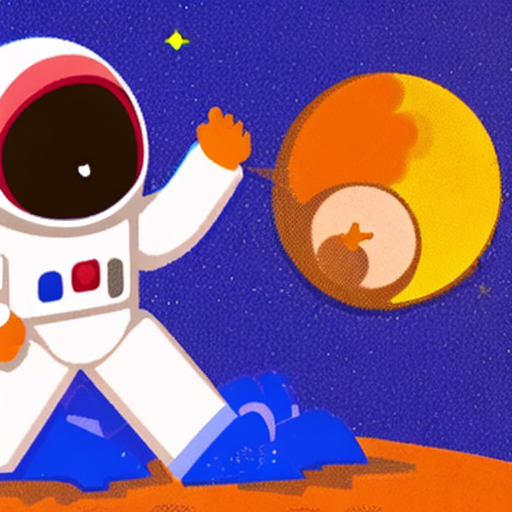

In [1]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch

model_id = "/home/jrajan/fine_tune_dreambooth/models/pointling"

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")








100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.95it/s]


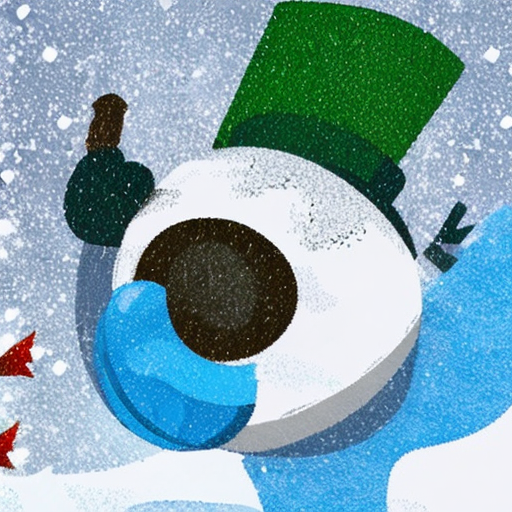

In [2]:
prompt = "An image of a pntlng animation character playing in snow"
image = pipe(prompt, num_samples=30, num_inference_steps=50, guidance_scale=7.5, width=512, height=512).images[0]
image
# prompt = "An image of a ckdg dog playing in snow"
# image = pipe(prompt, num_samples=30, num_inference_steps=50, guidance_scale=7.5, width=512, height=512).images[0]
# image
